In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
DATASET_ARRAY_INPUT = "/mnt/Data/LUNA/nodule_slices_arr.npy"
DATASET_ARRAY_OUTPUT = "/mnt/Data/LUNA/nodule_slices_arr_400x400.npy"
SLICE_SIZE = (400, 400)

In [59]:
dataset_array_input = np.load(DATASET_ARRAY_INPUT, mmap_mode='r')
range_arr = []
indices_min_arr = []
indices_max_arr = []
shape_export_slices = (*dataset_array_input.shape[:2], *SLICE_SIZE)
fp = np.lib.format.open_memmap(DATASET_ARRAY_OUTPUT, dtype=np.int32, mode='w+', shape=shape_export_slices)
for i in range(dataset_array_input.shape[0]):
    cols = np.argwhere(dataset_array_input[i, 1, :, :].sum(axis=0)>0)
    rows = np.argwhere(dataset_array_input[i, 1, :, :].sum(axis=1)>0)
    if not len(cols) or not len(rows):
        cols = np.array([[0], [399]])
        rows = np.array([[0], [399]])
    range_cols = cols[-1, 0] - cols[0, 0]
    range_rows = rows[-1, 0] - rows[0, 0]
    min_idx = np.array([rows[0, 0], cols[0, 0]])
    max_idx = np.array([rows[-1, 0], cols[-1, 0]])
    offset_col = (SLICE_SIZE[0] - range_cols) // 2
    offset_row = (SLICE_SIZE[1] - range_rows) // 2
    fp[i, 0, offset_row:offset_row+range_rows, offset_col:offset_col+range_cols] = \
        dataset_array_input[i, 0, min_idx[0]:max_idx[0], min_idx[1]:max_idx[1]]
    fp[i, 1, offset_row:offset_row+range_rows, offset_col:offset_col+range_cols] = \
        dataset_array_input[i, 1, min_idx[0]:max_idx[0], min_idx[1]:max_idx[1]]
    fp[i, 2, offset_row:offset_row+range_rows, offset_col:offset_col+range_cols] = \
        dataset_array_input[i, 2, min_idx[0]:max_idx[0], min_idx[1]:max_idx[1]]

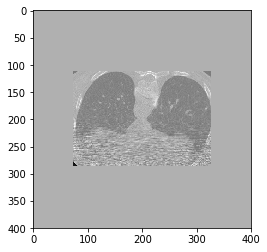

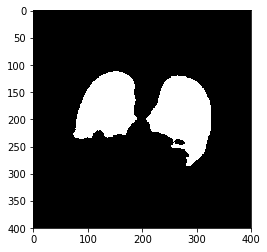

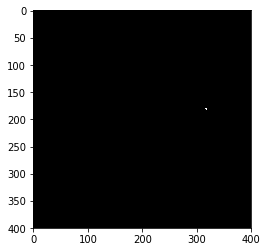

In [60]:
plt.imshow(fp[0,0,:,:], cmap="gray")
plt.show()
plt.imshow(fp[0,1,:,:], cmap="gray")
plt.show()
plt.imshow(fp[0,2,:,:], cmap="gray")
plt.show()

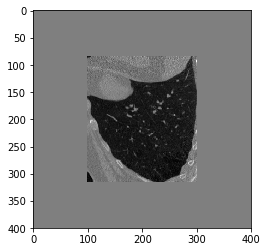

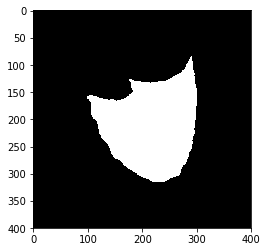

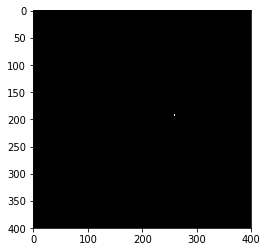

In [63]:
plt.imshow(fp[-1,0,:,:], cmap="gray")
plt.show()
plt.imshow(fp[-1,1,:,:], cmap="gray")
plt.show()
plt.imshow(fp[-1,2,:,:], cmap="gray")
plt.show()

In [64]:
print(fp.shape)
print(dataset_array_input.shape)

(24340, 3, 400, 400)
(24340, 3, 512, 512)


In [65]:
del fp